# MUST ACADEMY - Image Processing and Computer Vision Session

### Before we begin!

#### Pre-requisites

Please keep the following packages installed, before we begin

In [2]:
#! pip install opencv-python
# LinK : https://pypi.org/project/opencv-python/
import cv2
print('opencv:',cv2.__version__)

#! pip install numpy 
#! pip install matplotlib
#! pip install pandas

import numpy as np
print('numpy:',np.__version__)

import matplotlib
import matplotlib.pyplot as plt
print('matplotlib:',matplotlib.__version__)

import pandas as pd
print('pandas:',pd.__version__)

print('So, these are the package versions I will be using throughout.')

opencv: 4.2.0
numpy: 1.18.4
matplotlib: 2.2.2
pandas: 0.23.4
So, these are the package versions I will be using throughout.


## Hour 1: Getting started with computer vision 

Topics to be discussed :
1.	Images as Functions and Matrices.
2.	Mathematical operations with images.
3.	Image Filtering.
4.	Noises In Images.
5.	Image Transformations.

### 1. Images as Functions and Matrices

##### Loading and Displaying Images

Let's load and display an image, using open-cv.

In [5]:
image = cv2.imread('dataset/car.png')

We have successfully used open-cv's imread function to load our image and store it in a variable called image. But how do we verify if the image is correctly loaded? Do we print the variable?

In [6]:
print(image)

[[[247 247 247]
  [247 247 247]
  [247 247 247]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]

 [[247 247 247]
  [247 247 247]
  [247 247 247]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]

 [[247 247 247]
  [247 247 247]
  [247 247 247]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]

 ...

 [[247 247 247]
  [247 247 247]
  [247 247 247]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]

 [[247 247 247]
  [247 247 247]
  [247 247 247]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]

 [[247 247 247]
  [247 247 247]
  [247 247 247]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]]


Actually no! If we print the image, we will get raw form of the image as an array or a list of pixel values. So, basically, an image is a function of pixel intensity values at each location of the image.

**[ Fun Fact - The word pixel actually means picture elements! ]**

So, an image is actually a collection of all those pixel intensity values represented by I(x,y).

But the question still remains how do we display the image?

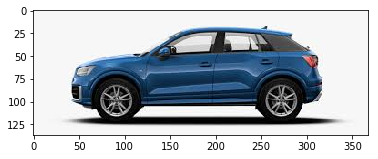

In [7]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

Ah, now we see our blue car! But did you notice we used another function cv2.cvtColor(image, cv2.COLOR_BGR2RGB), within plt.imshow(). Do you know why? Let's use plt.imshow() without the other function and let's see the difference.

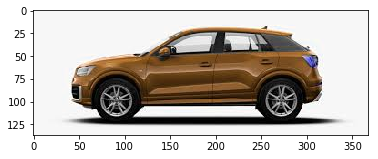

In [8]:
plt.imshow(image)

Is that magic? How did our blue car changed to a brown one with a blue back light instead of red? Well, actually, plt.imshow() by default displays the images in BGR format instead of RGB. So, we would have to explicity do a colour conversion and display the images in the correct format. And hence we will use cv2.cvtColor() for doing this conversion. Now, let's prepare a small utility function which we can call any time, to do this conversion.

(137, 368, 3)


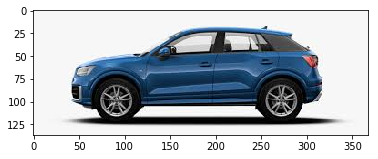

In [6]:
# Utility function to display images
def show_image(img, fig_size = None):
    print(img.shape)
    img = img.astype('uint8')
    
    if fig_size is not None:
        plt.figure(figsize=fig_size)
    
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    
show_image(image)

##### Image Dimensions and Data Types

In [10]:
print('Shape:',image.shape)
print('Data type:', type(image))
print('Each element type:',image.dtype)
print('max pixel value:', np.max(image))
print('min pixel value:', np.min(image))

Shape: (137, 368, 3)
Data type: <class 'numpy.ndarray'>
Each element type: uint8
max pixel value: 255
min pixel value: 0


Let me tell you another strange fact, later which will come handy. Since, our pixel values are of type 'uint8', if we add 1, to the brightest pixel, which is 255, the value won't change to 256 (it won't get any brighter!) rather it will change to 0! So, 255 + 1 = 0 in the unsigned int 8 world! And similarly, if we subtract 1 from the darkest pixel 0, it will be 255 in the world of the unsigned int8.

##### Colour Images and extracting channels from image

In [11]:
# Utility Functions - to convert coloured images to gray scale
def to_gray_scale(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray

(137, 368)


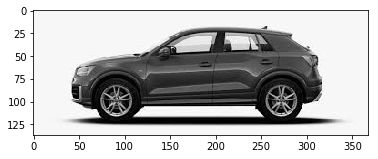

(137, 368)


In [12]:
gray_scaled_image = to_gray_scale(image)
show_image(gray_scaled_image)
print(gray_scaled_image.shape)

(137, 368)


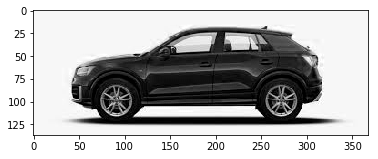

(137, 368)


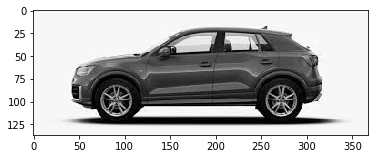

(137, 368)


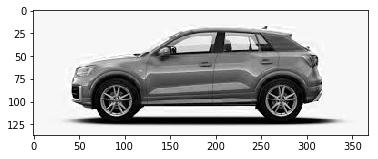

In [13]:
# Utility Functions - to convert coloured images to monochrome image
def to_monochrome(img, channel = 'R'):
    if channel == 'R':
        monochrome = img[:,:,2]
    if channel == 'G':
        monochrome = img[:,:,1]
    if channel == 'B':
        monochrome = img[:,:,0]
        
    return monochrome

# Red Monochrome
show_image(to_monochrome(image,channel = 'R'))
# Green Monochrome
show_image(to_monochrome(image,channel = 'G'))
# Blue Monochrome
show_image(to_monochrome(image,channel = 'B'))

In [14]:
# Utility Functions - to swap colour channels
def swap_color_channels(img, channel1 = 'R', channel2 = 'B'):
    duplicate = img.copy()
    
    dict_color = {'R':2,'G':1,'B':0}
    
    temp = duplicate[:,:,dict_color[channel1]].copy()
    duplicate[:,:,dict_color[channel1]] = duplicate[:,:,dict_color[channel2]].copy()
    duplicate[:,:,dict_color[channel2]] = temp.copy()
        
    return duplicate

(137, 368, 3)


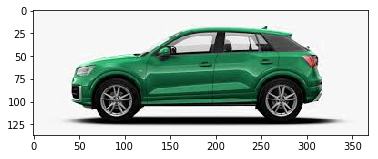

(137, 368, 3)


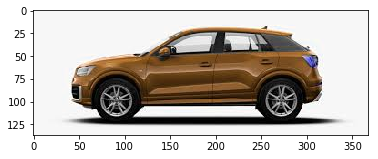

In [15]:
# Swap Blue and Green channels
show_image(swap_color_channels(image,channel1 = 'B', channel2 = 'G'))

# Swap Blue and Red channels
show_image(swap_color_channels(image,channel1 = 'B', channel2 = 'R'))

##### Cropping Images

Now, often doing image analysis, we need to pick up a region of interest (RoI) within the entire image. Once we highlight the RoI we usually would have to crop the selected region and extract the cropped portion of the image.

Example, let's say, in the car image, we are only interested in the front tyre of the car, or in the fruit image we want to get the top portion of the yellow pear. So, how exactly we do that?

First, we would have to highlight the RoIs in our images, and we will be using another utility function to do that.

(137, 368, 3)


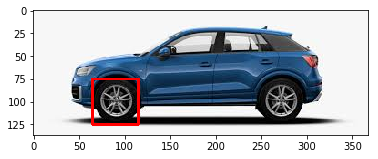

(50, 50, 3)


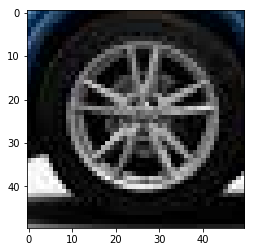

In [16]:
# Utility function to highlight region of interests
def draw_bounding_box(img, x,y,w,h):
    dupicate = img.copy()
    cv2.line(dupicate, (x,y), (x+w,y), color = (0,0,255), thickness = 2)
    cv2.line(dupicate, (x,y), (x,y+h), color = (0,0,255), thickness = 2)
    cv2.line(dupicate, (x,y+h), (x+w,y+h), color = (0,0,255), thickness = 2)
    cv2.line(dupicate, (x+w,y), (x+w,y+h), color = (0,0,255), thickness = 2)
    
    return dupicate

show_image(draw_bounding_box(image, x = 65, y =75, w = 50, h = 50)) 
# Pixel position of the top-left coordinate of the bounding box is represented by x and y
# Height and weight of the bounding box is represented by w and h

x = 65; y =75; w = 50; h = 50;
cropped_img = image[y:y+h, x:x+w]
show_image(cropped_img)

### 2. Mathematical operations with images

(320, 500, 3)


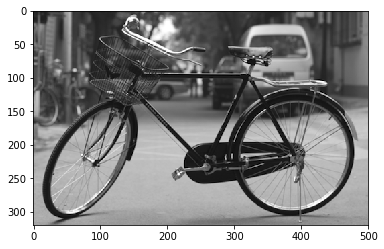

(320, 500, 3)


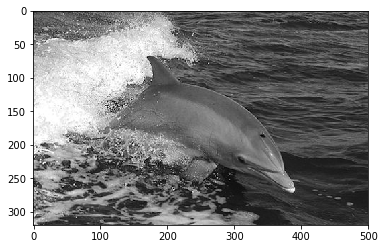

In [17]:
image1 = cv2.imread('dataset/bicycle.png')
image2 = cv2.imread('dataset/dolphin.png')

show_image(image1)
show_image(image2)

(320, 500, 3)


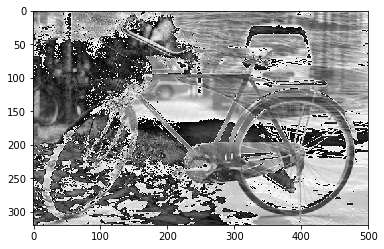

(320, 500, 3)


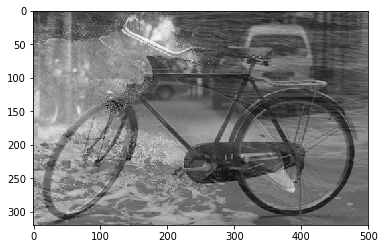

(320, 500, 3)


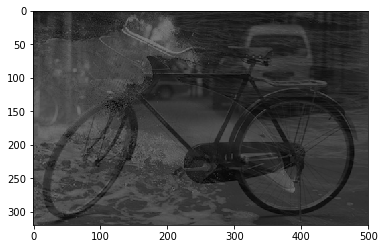

In [18]:
# Addition
added_image = image1 + image2
show_image(added_image)

# Adding averaged image
added_image = image1//2 + image2//2
show_image(added_image)

# Averging added image 
show_image(added_image//2)

Why there is a difference?

In [19]:
# Let's try this now?
a = np.array(200).astype('uint8')
b = np.array(100).astype('uint8')

c = a/2 + b/2
d = (a + b)/2

Is c = d? Or can you guess what the values of c and d will be?

In [20]:
print(c == d)

# what are the values of c and d?
print('Value of c is:', c)
print('Value of d is:', d)

False
Value of c is: 150.0
Value of d is: 22.0


Orginal Image
(320, 500, 3)


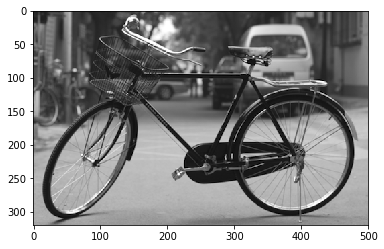

Image multiplied with 1.5
(320, 500, 3)


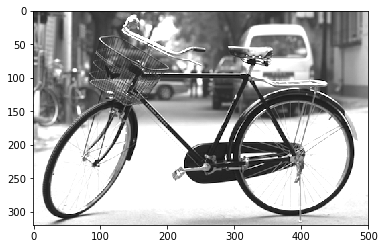

In [21]:
# Multiplication 
def normalize_image(img):
    img = img.astype('float')
    max_value = np.max(img)
    
    return img/max_value

print('Orginal Image')
show_image(image1)
print('Image multiplied with 1.5')
show_image(np.clip((image1.astype('float') * 1.5), 0., 255.).astype('uint8'))

Does the new image looks brighter? Yes, it does as multiplying pixel values will bring it closer to 255, which is the brightest pixel. But did you notice we had to use np.clip() to keep all the pixel values between 0 and 255? Otherwise, when we change it back to unsigned int, the image will look distorted. So, a quick task, why don't you try removing np.clip() and see how the image is looking!

##### Image Blending

Image blending was a popular trick for most photoshop specialists to bring interesting visual effects. It is nothing but a combination of some of the arithmatic image operators that we saw. So, let's try blending with two new images

(500, 500, 3)


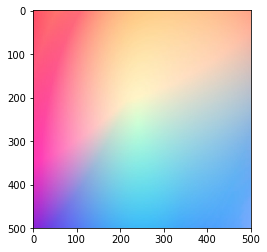

(500, 500, 3)


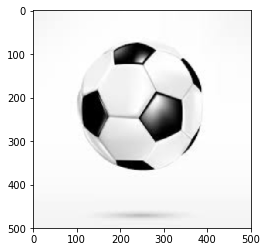

In [22]:
image3 = cv2.resize(cv2.imread('dataset/blend1.PNG'), (500,500))
image4 = cv2.resize(cv2.imread('dataset/football.png'), (500,500))
show_image(image3)
show_image(image4)

(500, 500, 3)


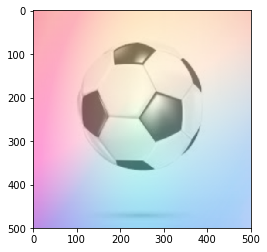

(500, 500, 3)


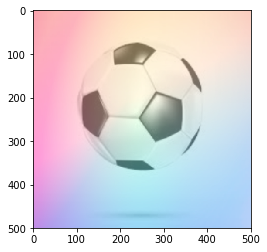

In [23]:
# Our own blending function
def blend_images(img1, img2, blending_ratio):
    return blending_ratio * img1 + (1. - blending_ratio) * img2

blended_img = blend_images(image3, image4, 0.5)
show_image(blended_img)

opencv_blended = cv2.addWeighted(image3,0.5,image4,0.5,0.5)
show_image(opencv_blended)

##### Image Difference

Image difference can actually be thought as more than just mere image subtraction. But can be an important technique to localize difference in two images. So, let's try our hand at image differencing using the fruit images we saw before.

(258, 320, 3)


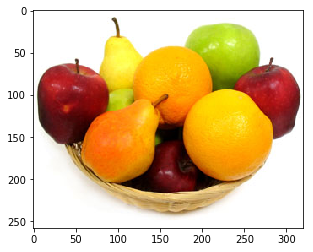

(258, 320, 3)


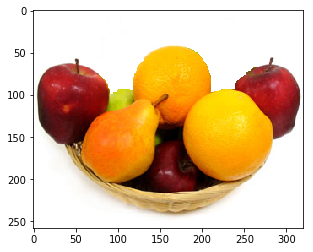

In [24]:
image5 = cv2.imread('dataset/fruit.png')
image6 = cv2.imread('dataset/fruit2.png')

show_image(image5)
show_image(image6)

Displaying the highlighted missing objects
(258, 320, 3)


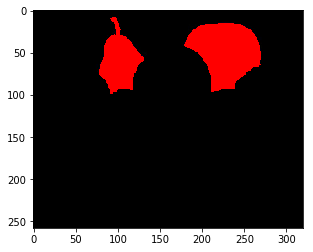

Localized the new images with missing objects
(258, 320, 3)


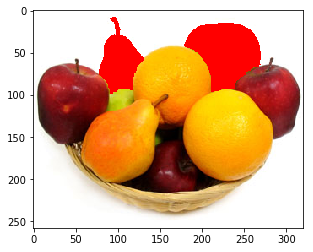

Original image for comparison
(258, 320, 3)


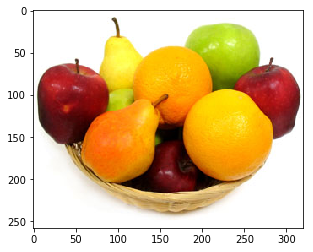

In [25]:
# Creating a copy of the images as we will be playing with the image pixel values
# and accidently we don't want any changes to the original images
new_img = image6.copy()
orig_img = image5.copy()

# find the difference image
difference_img = cv2.subtract(new_img, orig_img)
gray = cv2.cvtColor(difference_img, cv2.COLOR_BGR2GRAY)
difference_img[gray > 5] = [0, 0, 255]

# Displaying the highlighted missing objects
print('Displaying the highlighted missing objects')
show_image(difference_img)

# adding the coloured mask to the new image, to localize the missing objects
new_img[gray > 5] = [0, 0, 255]

print('Localized the new images with missing objects')
show_image(new_img)
print('Original image for comparison')
show_image(orig_img)

##### Bitwise operations

Bitwise not converts all black pixels to white and vice versa
(258, 320)


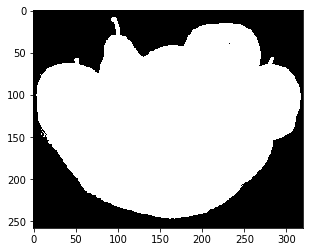

(258, 320)


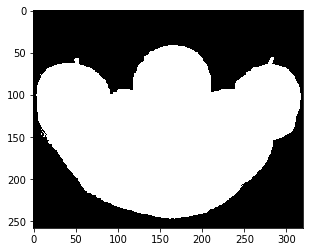

Bitwise and operations on the masks -- which takes the common pixels in both the images
(258, 320)


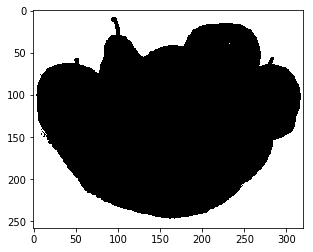

Bitwise and operations on the masks -- which takes unique pixels from both the images
(258, 320)


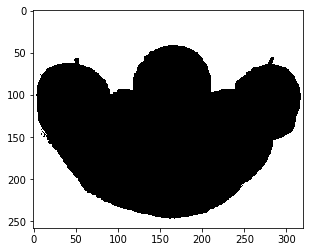

In [26]:
# Now create a mask of logo and create its inverse mask also
gray_orig = cv2.cvtColor(orig_img,cv2.COLOR_BGR2GRAY)
_, mask1 = cv2.threshold(gray_orig, 245, 255, cv2.THRESH_BINARY)

gray_new = cv2.cvtColor(image6,cv2.COLOR_BGR2GRAY)
_, mask2 = cv2.threshold(gray_new, 245, 255, cv2.THRESH_BINARY)

print('Bitwise not converts all black pixels to white and vice versa')
mask_inv1 = cv2.bitwise_not(mask1)
mask_inv2 = cv2.bitwise_not(mask2)
show_image(mask_inv1)
show_image(mask_inv2)


print('Bitwise and operations on the masks -- which takes the common pixels in both the images')
bit_and = cv2.bitwise_and(mask1, mask2)
show_image(bit_and)

print('Bitwise and operations on the masks -- which takes unique pixels from both the images')
bit_or = cv2.bitwise_or(mask1, mask2)
show_image(bit_or)

let's see a fun application of bitwise image operations

(288, 512)


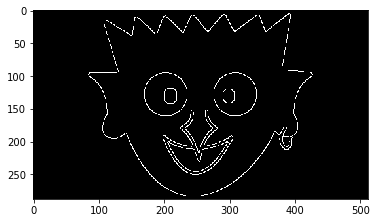

(288, 512)


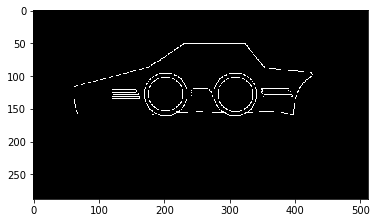

(288, 512)


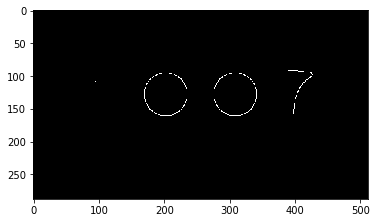

In [27]:
bit1 = cv2.imread('dataset/bit1.png', 0)
bit2 = cv2.imread('dataset/bit2.png', 0)

show_image(bit1)
show_image(bit2)

bit_and2 = cv2.bitwise_and(bit1, bit2)
show_image(bit_and2)

##### Image Statistics

In [28]:
def image_stats(img):
    max = np.max(img)
    print('Max pixel value:', max)
    min = np.min(img)
    print('Min pixel value:', min)
    mean = np.mean(img)
    print('Mean pixel value:', mean)
    median = np.median(img)
    print('Median pixel value:', median)
    
    print('\nPixel Intensity Distribution:')
    plt.hist(img.ravel(),256,[0,256], color='r') 
    plt.show()    

Max pixel value: 255
Min pixel value: 0
Mean pixel value: 114.17345625
Median pixel value: 110.0

Pixel Intensity Distribution:


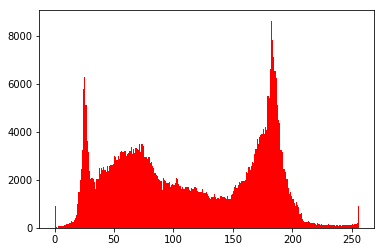

In [29]:
image_stats(image1)

### 1.d - Image Filtering

Applying various filters is an extremely handy technique for image analysis and manipulation. But the question is what exactly are these "filters"? An image filter or a kernel is nothing but another matrix or a numpy array of a definite structure and when applying certain mathematical operators along with these filters, it can yield certain meaningful output images which is important for image analysis. Now, let's look at some of the popular image filters which is widely used.

##### Average Filtering

Let's define a 2D filter of shape 5x5 and the filter values will be uniformly distributed since it is an average filter, which essentially means, value at each position will be same. In-order to create a normalized box filter, we will take value at each position to be 1/25.

(137, 736, 3)


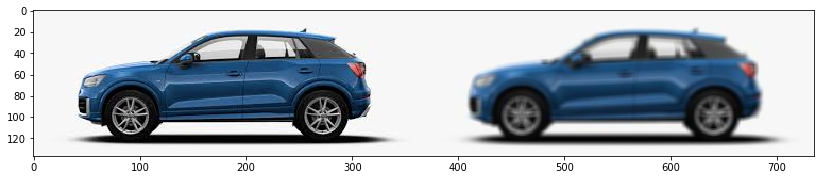

In [30]:
kernel = np.ones((5,5))/25.

filtered_img = cv2.filter2D(image,-1,kernel)

# concatenate both the images horizontally
clubbed_image = np.concatenate((image, filtered_img), axis=1)
show_image(clubbed_image, (14,7))

##### Gaussian Filtering

Gaussian filtering is done using a Gaussian function rather than a box function. The kernel dimensions should be positive and odd. And it is often called as a Gaussian Blur filter.

(137, 736, 3)


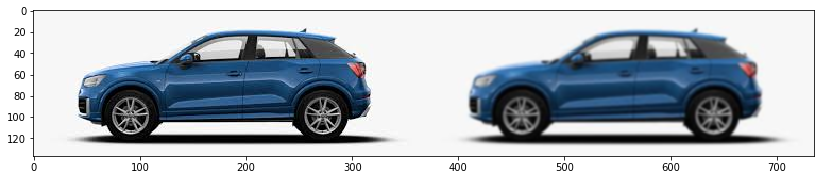

In [31]:
filtered_img = cv2.GaussianBlur(image,(5,5),0)

# concatenate both the images horizontally
clubbed_image = np.concatenate((image, filtered_img), axis=1)
show_image(clubbed_image, (14,7))

##### Median Filtering

Median filters computes the median of all the pixels under the window region of the filter and the central pixel is replaced with this median value. We will see the use of these filters when we deal with removing salt and pepper noise.

(137, 736, 3)


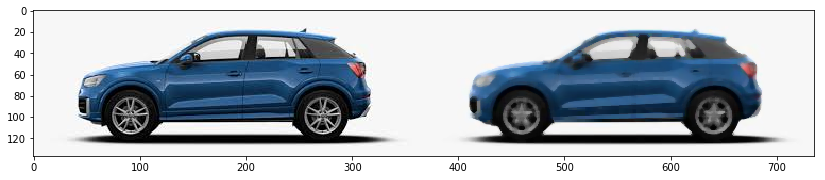

In [32]:
filtered_img = cv2.medianBlur(image, 5)

# concatenate both the images horizontally
clubbed_image = np.concatenate((image, filtered_img), axis=1)
show_image(clubbed_image, (14,7))

#### Bilateral Filters

Most of the filters above (depending upon the dimensions selected) tends to blur the edges. In such a case, bilateral filters are extremely effective as it tends to preserve the edges and remove the noise. Even this filter uses a Gaussian filter in space domain, but along with that, it also uses another multiplicative Gaussian filter, which is a function of pixel intensity differences.

(137, 736, 3)


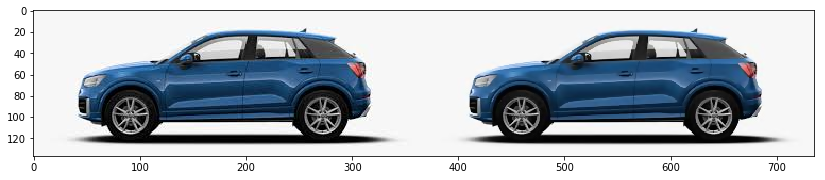

In [33]:
filtered_img = cv2.bilateralFilter(image,5,50,50)

# concatenate both the images horizontally
clubbed_image = np.concatenate((image, filtered_img), axis=1)
show_image(clubbed_image, (14,7))

### 1.e - Noise Removal from images

Taking an example of Salt and Pepper noise removal.

In [34]:
# Add noise to the image
def imnoise(img_in, dens, method = 'salt & pepper'):

    if method == 'salt & pepper':
        img_out = np.copy(img_in)
        r, c = img_in.shape
        x = np.random.rand(r, c)
        ids = x < dens / 2.
        img_out[ids] = 0
        ids = dens / 2. <= x
        ids &= x < dens
        img_out[ids] = 255

        return img_out

(469, 500)


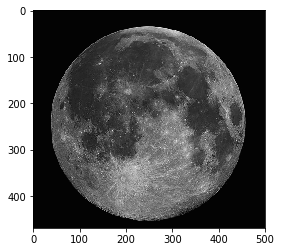

(469, 500)


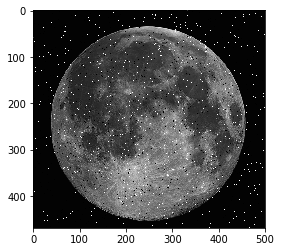

In [43]:
image_wo_noise = cv2.imread('dataset/moon.png',0)
show_image(image_wo_noise)

# Add salt & pepper
noisy_img = imnoise(image_wo_noise, 0.02)
show_image(noisy_img)

(469, 500)


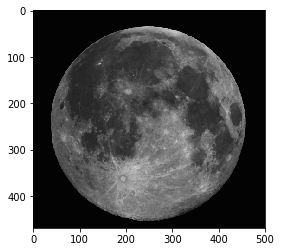

In [41]:
# Apply a median filter
median_filtered = cv2.medianBlur(noisy_img, 3)
show_image(median_filtered)

### 1.f - Image Transformations

For various image analysis, image transformation techniques like rotation, mirroring, and various other transforms are important. One important application is in Data Augmentation concept used in Deep Learning.

##### Rotation

Rotate by 90 degress anti-clockwise
(368, 137, 3)


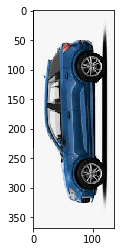

Rotate by 90 degress clockwise
(368, 137, 3)


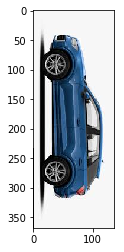

In [50]:
# For simplicity we will use scipy package
from scipy import ndimage

print("Rotate by 90 degress anti-clockwise")
show_image(ndimage.rotate(image,90))

print("Rotate by 90 degress clockwise")
show_image(ndimage.rotate(image,-90))

##### Mirroring

Mirror horizontally
(137, 368, 3)


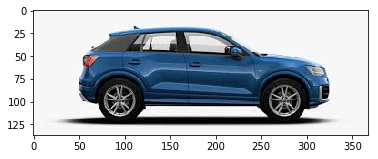

Mirror Vertically
(137, 368, 3)


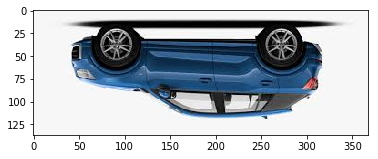

In [52]:
print("Mirror horizontally")
show_image(np.flip(image,1))

print("Mirror Vertically")
show_image(np.flip(image,0))

##### Resizing

(50, 50, 3)


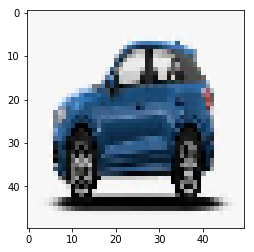

In [53]:
show_image(cv2.resize(image,(50,50)))

##### Translation

(137, 368, 3)


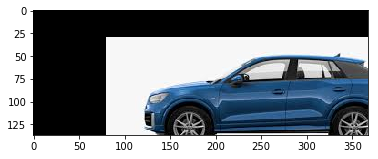

In [56]:
M = np.float32([[1,0,80],[0,1,30]])
rows,cols = image.shape[0], image.shape[1]
show_image(cv2.warpAffine(image,M,(cols,rows)))

### Challenge 1

Creating transparent pencil sketch portraits from original images.

Given : An original portrait image

Output : A pencil sketch shaded image

(403, 458)


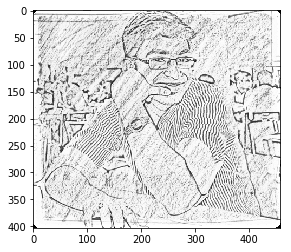

In [8]:
pencilSketch = cv2.imread('dataset/PencilSketch.png',0)
show_image(pencilSketch)